# Analise de produção por campo BR ANP

#### Aqui vamos explorar um banco de dados da Petrobras, estatal brasileira de produção de petróleo, óleo e gás 
##### Extrair informações sobre os campos de produção 

In [85]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai')
import pandas as pd
import numpy as np

In [86]:
# Recarregar o arquivo para redefinir 'clear_col_df_new' como DataFrame

novo_df = pd.read_csv('2023_01_producao_Presal.csv', sep=';', encoding='utf-8')

In [87]:
# Removendo colunas com "Unnamed"

df_anp_data = novo_df.loc[:,~ novo_df.columns.str.contains('^Unnamed')]
df_anp_data.head()

,Estado,Bacia,Nome Poço,Campo,Operador,Número do Contrato,Período,Óleo (bbl/dia),Condensado (bbl/dia),Petróleo (bbl/dia),...,Tempo de Produção (hs por mês),Período da Carga,Corrente,Grau API,Fração de Destilados,% em Volumes,Densidade GLP Gás,Densidade GLP Líquido,PCS GP\n(kJ/m³),Data de atualização
0,NaN,NaN,ANP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Leves,Metano,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Corte,NaN,NaN,NaN,NaN,NaN
2,Rio de Janeiro,Santos,1-BRSA-1116-RJS,ITAPU_ECO,Petrobras,48610012913201005,2023/01,"24.589,0097","0,0000","24.589,0097",...,0.0,2022/12,ITAPU,"29,3",< 270ºC,"67,708","2,004","528,51919","42662,1051",13/03/2023
3,Rio de Janeiro,Santos,7-LL-46-RJS,TUPI,Petrobras,486100038862000,2023/01,"9.268,5707","0,0000","9.268,5707",...,672.0,2022/02,Tupi,"30,7",< 270ºC,NaN,NaN,NaN,NaN,13/03/2023
4,Rio de Janeiro,Santos,7-LL-45D-RJS,TUPI,Petrobras,486100038862000,2023/01,"2.229,7516","0,0000","2.229,7516",...,744.0,2022/02,Tupi,"30,7",< 270ºC,NaN,NaN,NaN,NaN,13/03/2023


In [88]:
df_anp_data.shape

(348, 25)

In [89]:
# Aplicar as conversões de tipo nas colunas desejadas
numero_colunas = [
    'Óleo (bbl/dia)', 'Condensado (bbl/dia)', 'Petróleo (bbl/dia)', 'Gás Natural (Mm³/dia)', 
    'Volume Gás Royalties (Mm³/dia)', 'Água (bbl/dia)', 'Grau API'
]

for col in numero_colunas:
    # Remover pontos de milhar e substituir vírgulas por pontos
    df_anp_data[col] = df_anp_data[col].str.replace('.', '', regex=False)
    df_anp_data[col] = df_anp_data[col].str.replace(',', '.', regex=False)
    # Converte para float
    df_anp_data[col] = pd.to_numeric(df_anp_data[col], errors='coerce')

# Verifique as informações para confirmar as conversões
df_anp_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Estado                          346 non-null    object 
 1   Bacia                           346 non-null    object 
 2   Nome Poço                       347 non-null    object 
 3   Campo                           346 non-null    object 
 4   Operador                        346 non-null    object 
 5   Número do Contrato              346 non-null    object 
 6   Período                         346 non-null    object 
 7   Óleo (bbl/dia)                  346 non-null    float64
 8   Condensado (bbl/dia)            346 non-null    float64
 9   Petróleo (bbl/dia)              346 non-null    float64
 10  Gás Natural (Mm³/dia)           346 non-null    float64
 11  Volume Gás Royalties (Mm³/dia)  346 non-null    float64
 12  Água (bbl/dia)                  346 

C:\Users\Cliente\AppData\Local\Temp\ipykernel_17916\2163341258.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anp_data[col] = df_anp_data[col].str.replace('.', '', regex=False)
C:\Users\Cliente\AppData\Local\Temp\ipykernel_17916\2163341258.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anp_data[col] = df_anp_data[col].str.replace(',', '.', regex=False)
C:\Users\Cliente\AppData\Local\Temp\ipykernel_17916\2163341258.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [90]:
# Lista das colunas convertidas para tipo numérico
df_anp_data.columns

Index(['Estado', 'Bacia', 'Nome Poço', 'Campo', 'Operador',
       'Número do Contrato', 'Período', 'Óleo (bbl/dia)',
       'Condensado (bbl/dia)', 'Petróleo (bbl/dia)', 'Gás Natural (Mm³/dia)',
       'Volume Gás Royalties (Mm³/dia)', 'Água (bbl/dia)',
       'Instalação Destino', 'Tipo Instalação',
       'Tempo de Produção (hs por mês)', 'Período da Carga', 'Corrente',
       'Grau API', 'Fração de Destilados', '% em Volumes', 'Densidade GLP Gás',
       'Densidade GLP Líquido', 'PCS GP\n(kJ/m³)', 'Data de atualização'],
      dtype='object')

In [91]:
# Obter os índices das colunas em numeric_columns
numero_idx = [df_anp_data.columns.get_loc(col) for col in numero_colunas]

# Exibir os índices
print(numero_idx)


[7, 8, 9, 10, 11, 12, 18]


In [92]:
# Selecionar todas as linhas das colunas com índices em selecao_linha_colunas
selecao_linha_colunas = df_anp_data.iloc[:, numero_idx]

# Exibir o DataFrame resultante com todas as linhas e colunas selecionadas
print(selecao_linha_colunas)


     Óleo (bbl/dia)  Condensado (bbl/dia)  Petróleo (bbl/dia)  \
0               NaN                   NaN                 NaN   
1               NaN                   NaN                 NaN   
2        24589.0097                   0.0          24589.0097   
3         9268.5707                   0.0           9268.5707   
4         2229.7516                   0.0           2229.7516   
..              ...                   ...                 ...   
343      10217.2163                   0.0          10217.2163   
344      10972.9944                   0.0          10972.9944   
345       3896.5870                   0.0           3896.5870   
346       2954.0391                   0.0           2954.0391   
347      11995.2534                   0.0          11995.2534   

     Gás Natural (Mm³/dia)  Volume Gás Royalties (Mm³/dia)  Água (bbl/dia)  \
0                      NaN                             NaN             NaN   
1                      NaN                             NaN     

In [93]:
selecao_linha_colunas.isna()

,Óleo (bbl/dia),Condensado (bbl/dia),Petróleo (bbl/dia),Gás Natural (Mm³/dia),Volume Gás Royalties (Mm³/dia),Água (bbl/dia),Grau API
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
343,False,False,False,False,False,False,False
344,False,False,False,False,False,False,False
345,False,False,False,False,False,False,False
346,False,False,False,False,False,False,False


In [94]:
selecao_linha_colunas.isna().sum()

Óleo (bbl/dia)                    2
Condensado (bbl/dia)              2
Petróleo (bbl/dia)                2
Gás Natural (Mm³/dia)             2
Volume Gás Royalties (Mm³/dia)    2
Água (bbl/dia)                    2
Grau API                          6
dtype: int64

In [95]:
selecao_linha_colunas.duplicated().sum()

3

In [96]:
filtro_data_df_duplicada = selecao_linha_colunas.duplicated()

In [97]:
filtro_data_df_duplicada.info()

<class 'pandas.core.series.Series'>
RangeIndex: 348 entries, 0 to 347
Series name: None
Non-Null Count  Dtype
--------------  -----
348 non-null    bool 
dtypes: bool(1)
memory usage: 480.0 bytes


In [98]:
df_anp_data["Óleo (bbl/dia)"]

0             NaN
1             NaN
2      24589.0097
3       9268.5707
4       2229.7516
          ...    
343    10217.2163
344    10972.9944
345     3896.5870
346     2954.0391
347    11995.2534
Name: Óleo (bbl/dia), Length: 348, dtype: float64

In [99]:
df_anp_data["Estado"].unique()


array([nan, 'Rio de Janeiro', 'São Paulo', 'Espírito Santo'], dtype=object)

In [100]:
df_anp_data[df_anp_data["Estado"].isnull()].head()


,Estado,Bacia,Nome Poço,Campo,Operador,Número do Contrato,Período,Óleo (bbl/dia),Condensado (bbl/dia),Petróleo (bbl/dia),...,Tempo de Produção (hs por mês),Período da Carga,Corrente,Grau API,Fração de Destilados,% em Volumes,Densidade GLP Gás,Densidade GLP Líquido,PCS GP\n(kJ/m³),Data de atualização
0,NaN,NaN,ANP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Leves,Metano,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Corte,NaN,NaN,NaN,NaN,NaN


In [101]:
df_anp_data["Tempo de Produção (hs por mês)"]

0        NaN
1        NaN
2        0.0
3      672.0
4      744.0
       ...  
343    529.0
344    537.0
345    345.0
346    537.0
347    531.0
Name: Tempo de Produção (hs por mês), Length: 348, dtype: float64

In [102]:
# Preencher os valores Nan 
df_anp_data.fillna(0)

,Estado,Bacia,Nome Poço,Campo,Operador,Número do Contrato,Período,Óleo (bbl/dia),Condensado (bbl/dia),Petróleo (bbl/dia),...,Tempo de Produção (hs por mês),Período da Carga,Corrente,Grau API,Fração de Destilados,% em Volumes,Densidade GLP Gás,Densidade GLP Líquido,PCS GP\n(kJ/m³),Data de atualização
0,0,0,ANP,0,0,0,0,0.0000,0.0,0.0000,...,0.0,0,0,0.0,Leves,Metano,0,0,0,0
1,0,0,0,0,0,0,0,0.0000,0.0,0.0000,...,0.0,0,0,0.0,Corte,0,0,0,0,0
2,Rio de Janeiro,Santos,1-BRSA-1116-RJS,ITAPU_ECO,Petrobras,48610012913201005,2023/01,24589.0097,0.0,24589.0097,...,0.0,2022/12,ITAPU,29.3,< 270ºC,"67,708","2,004","528,51919","42662,1051",13/03/2023
3,Rio de Janeiro,Santos,7-LL-46-RJS,TUPI,Petrobras,486100038862000,2023/01,9268.5707,0.0,9268.5707,...,672.0,2022/02,Tupi,30.7,< 270ºC,0,0,0,0,13/03/2023
4,Rio de Janeiro,Santos,7-LL-45D-RJS,TUPI,Petrobras,486100038862000,2023/01,2229.7516,0.0,2229.7516,...,744.0,2022/02,Tupi,30.7,< 270ºC,0,0,0,0,13/03/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,Rio de Janeiro,Santos,7-BUZ-31D-RJS,BÚZIOS,Petrobras,48610012913201005,2023/01,10217.2163,0.0,10217.2163,...,529.0,2022/02,Búzios,28.7,< 270ºC,"60,15","2,04893","533,88699","35593,3546",13/03/2023
344,Rio de Janeiro,Santos,7-BUZ-30-RJS,BÚZIOS,Petrobras,48610012913201005,2023/01,10972.9944,0.0,10972.9944,...,537.0,2022/02,Búzios,28.7,< 270ºC,"60,15","2,04893","533,88699","35593,3546",13/03/2023
345,Rio de Janeiro,Santos,7-BUZ-29D-RJS,BÚZIOS,Petrobras,48610012913201005,2023/01,3896.5870,0.0,3896.5870,...,345.0,2022/02,Búzios,28.7,< 270ºC,"60,15","2,04893","533,88699","35593,3546",13/03/2023
346,Rio de Janeiro,Santos,7-BUZ-36DA-RJS,BÚZIOS,Petrobras,48610012913201005,2023/01,2954.0391,0.0,2954.0391,...,537.0,2022/02,Búzios,28.7,< 270ºC,"60,15","2,04893","533,88699","35593,3546",13/03/2023


In [103]:
df_anp_data.isna().sum()

Estado                              2
Bacia                               2
Nome Poço                           1
Campo                               2
Operador                            2
Número do Contrato                  2
Período                             2
Óleo (bbl/dia)                      2
Condensado (bbl/dia)                2
Petróleo (bbl/dia)                  2
Gás Natural (Mm³/dia)               2
Volume Gás Royalties (Mm³/dia)      2
Água (bbl/dia)                      2
Instalação Destino                  4
Tipo Instalação                     4
Tempo de Produção (hs por mês)      2
Período da Carga                    6
Corrente                            6
Grau API                            6
Fração de Destilados                0
% em Volumes                      115
Densidade GLP Gás                 116
Densidade GLP Líquido             116
PCS GP\n(kJ/m³)                   116
Data de atualização                 2
dtype: int64

In [104]:
df_anp_data["Tempo de Produção (hs por mês)"].unique()

array([ nan,   0., 672., 744., 657., 677., 444., 548., 188., 680., 678.,
       674., 529., 535., 685., 423., 426., 652., 663., 644., 491., 645.,
       511., 650., 639., 665.,  45., 287., 682., 542., 231., 728., 323.,
       356., 317., 348., 447., 429., 136., 653., 646., 524., 477., 500.,
       731., 742., 676., 661.,  75., 438., 708., 158., 715., 709., 718.,
       592., 706., 312., 505., 700., 689., 473., 688., 662., 364., 385.,
       371.,   1.,  53., 449., 442., 360., 730., 738., 698., 743., 716.,
       540., 428., 512., 536., 527., 532., 701., 699., 679., 690., 539.,
       533., 537., 345., 531.])

In [105]:
df_anp_data["Tempo de Produção (hs por mês)"].describe()

count    346.000000
mean     538.471098
std      194.040592
min        0.000000
25%      447.000000
50%      548.000000
75%      685.000000
max      744.000000
Name: Tempo de Produção (hs por mês), dtype: float64

In [106]:
df_anp_data.value_counts

<bound method DataFrame.value_counts of              Estado   Bacia        Nome Poço      Campo   Operador  \
0               NaN     NaN              ANP        NaN        NaN   
1               NaN     NaN              NaN        NaN        NaN   
2    Rio de Janeiro  Santos  1-BRSA-1116-RJS  ITAPU_ECO  Petrobras   
3    Rio de Janeiro  Santos      7-LL-46-RJS       TUPI  Petrobras   
4    Rio de Janeiro  Santos     7-LL-45D-RJS       TUPI  Petrobras   
..              ...     ...              ...        ...        ...   
343  Rio de Janeiro  Santos    7-BUZ-31D-RJS     BÚZIOS  Petrobras   
344  Rio de Janeiro  Santos     7-BUZ-30-RJS     BÚZIOS  Petrobras   
345  Rio de Janeiro  Santos    7-BUZ-29D-RJS     BÚZIOS  Petrobras   
346  Rio de Janeiro  Santos   7-BUZ-36DA-RJS     BÚZIOS  Petrobras   
347  Rio de Janeiro  Santos    7-BUZ-24D-RJS     BÚZIOS  Petrobras   

    Número do Contrato  Período  Óleo (bbl/dia)  Condensado (bbl/dia)  \
0                  NaN      NaN             Na

In [107]:
df_anp_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
343    False
344    False
345    False
346    False
347    False
Length: 348, dtype: bool

In [108]:
# obtendo a informação de quantas amostras diferentes
df_anp_data[df_anp_data.isna().any(axis=1)]

,Estado,Bacia,Nome Poço,Campo,Operador,Número do Contrato,Período,Óleo (bbl/dia),Condensado (bbl/dia),Petróleo (bbl/dia),...,Tempo de Produção (hs por mês),Período da Carga,Corrente,Grau API,Fração de Destilados,% em Volumes,Densidade GLP Gás,Densidade GLP Líquido,PCS GP\n(kJ/m³),Data de atualização
0,NaN,NaN,ANP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Leves,Metano,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Corte,NaN,NaN,NaN,NaN,NaN
3,Rio de Janeiro,Santos,7-LL-46-RJS,TUPI,Petrobras,486100038862000,2023/01,9268.5707,0.0,9268.5707,...,672.0,2022/02,Tupi,30.7,< 270ºC,NaN,NaN,NaN,NaN,13/03/2023
4,Rio de Janeiro,Santos,7-LL-45D-RJS,TUPI,Petrobras,486100038862000,2023/01,2229.7516,0.0,2229.7516,...,744.0,2022/02,Tupi,30.7,< 270ºC,NaN,NaN,NaN,NaN,13/03/2023
5,Rio de Janeiro,Santos,7-LL-73D-RJS,TUPI,Petrobras,486100038862000,2023/01,1981.8641,0.0,1981.8641,...,744.0,2022/02,Tupi,30.7,< 270ºC,NaN,NaN,NaN,NaN,13/03/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,São Paulo,Santos,7-SPH-4D-SPS,SAPINHOÁ,Petrobras,486100038842000,2023/01,14295.8289,0.0,14295.8289,...,662.0,2022/02,Sapinhoá,30.1,< 270ºC,NaN,NaN,NaN,NaN,13/03/2023
309,São Paulo,Santos,7-SPH-3-SPS,SAPINHOÁ,Petrobras,486100038842000,2023/01,18879.0400,0.0,18879.0400,...,685.0,2022/02,Sapinhoá,30.1,< 270ºC,NaN,NaN,NaN,NaN,13/03/2023
310,São Paulo,Santos,7-SPH-2D-SPS,SAPINHOÁ,Petrobras,486100038842000,2023/01,12317.7440,0.0,12317.7440,...,689.0,2022/02,Sapinhoá,30.1,< 270ºC,NaN,NaN,NaN,NaN,13/03/2023
311,São Paulo,Santos,9-BRSA-928-SPS,SAPINHOÁ,Petrobras,486100038842000,2023/01,0.0899,0.0,0.0899,...,1.0,2022/02,Sapinhoá,30.1,< 270ºC,NaN,NaN,NaN,NaN,13/03/2023


In [129]:
filtro = df_anp_data["Tempo de Produção (hs por mês)"].isna()

In [130]:
comp_anp_data = df_anp_data[["Tempo de Produção (hs por mês)","Petróleo (bbl/dia)","Óleo (bbl/dia)","Gás Natural (Mm³/dia)"]]
comp_anp_data

,Tempo de Produção (hs por mês),Petróleo (bbl/dia),Óleo (bbl/dia),Gás Natural (Mm³/dia)
2,0.0,24589.0097,24589.0097,288.0496
3,672.0,9268.5707,9268.5707,1112.1985
4,744.0,2229.7516,2229.7516,149.6987
5,744.0,1981.8641,1981.8641,116.4249
6,657.0,7980.3577,7980.3577,1206.1087
...,...,...,...,...
343,529.0,10217.2163,10217.2163,553.7107
344,537.0,10972.9944,10972.9944,373.1134
345,345.0,3896.5870,3896.5870,241.5630
346,537.0,2954.0391,2954.0391,177.8065


In [131]:
df_anp_data[filtro][["Petróleo (bbl/dia)","Óleo (bbl/dia)","Gás Natural (Mm³/dia)"]]

,Petróleo (bbl/dia),Óleo (bbl/dia),Gás Natural (Mm³/dia)


In [132]:
df_anp_data['Tempo de Produção (hs por mês)'].fillna(
    np.ceil(
        df_anp_data['Petróleo (bbl/dia)'] / df_anp_data['Óleo (bbl/dia)'] / df_anp_data['Gás Natural (Mm³/dia)']
    ),inplace=True
)

C:\Users\Cliente\AppData\Local\Temp\ipykernel_17916\3815514713.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_anp_data['Tempo de Produção (hs por mês)'].fillna(
C:\Users\Cliente\AppData\Local\Temp\ipykernel_17916\3815514713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anp_data['Tempo de Produção (hs por mês)'].fillna(


In [133]:
df_anp_data[filtro][["Petróleo (bbl/dia)","Óleo (bbl/dia)","Gás Natural (Mm³/dia)"]]

,Petróleo (bbl/dia),Óleo (bbl/dia),Gás Natural (Mm³/dia)


In [134]:
df_anp_data["Petróleo (bbl/dia)"].value_counts()

Petróleo (bbl/dia)
0.0000        3
24589.0097    1
7026.8262     1
29805.4926    1
1.0999        1
             ..
3566.0307     1
24074.5361    1
21365.7817    1
19812.3070    1
11995.2534    1
Name: count, Length: 344, dtype: int64

In [135]:
coluna_anp_dropa = comp_anp_data[["Tempo de Produção (hs por mês)","Petróleo (bbl/dia)","Óleo (bbl/dia)","Gás Natural (Mm³/dia)"]]

In [136]:
coluna_anp_dropa = ["Tempo de Produção (hs por mês)", "Petróleo (bbl/dia)", "Óleo (bbl/dia)", "Gás Natural (Mm³/dia)"]
df_anp_data.dropna(subset=coluna_anp_dropa, inplace=True)


C:\Users\Cliente\AppData\Local\Temp\ipykernel_17916\2947489098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anp_data.dropna(subset=coluna_anp_dropa, inplace=True)


In [142]:
comp_anp_data.value_counts()

Tempo de Produção (hs por mês)  Petróleo (bbl/dia)  Óleo (bbl/dia)  Gás Natural (Mm³/dia)
0.0                             0.0000              0.0000          0.0000                   3
677.0                           1284.4922           1284.4922       44.6277                  1
678.0                           604.3170            604.3170        21.1945                  1
                                93.4037             93.4037         8.4632                   1
                                45.2724             45.2724         1.5878                   1
                                                                                            ..
511.0                           106.3615            106.3615        4.7144                   1
505.0                           19308.2532          19308.2532      702.3676                 1
                                435.6888            435.6888        15.8489                  1
                                253.4333            253

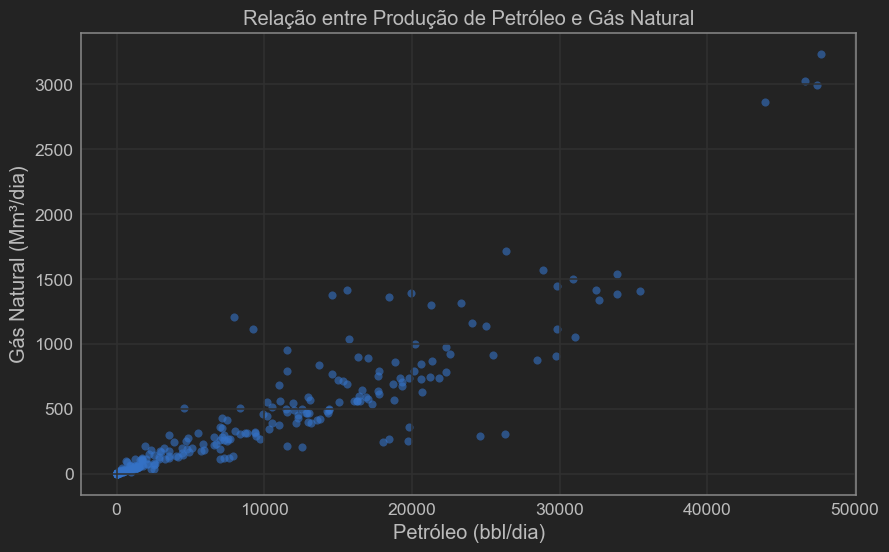

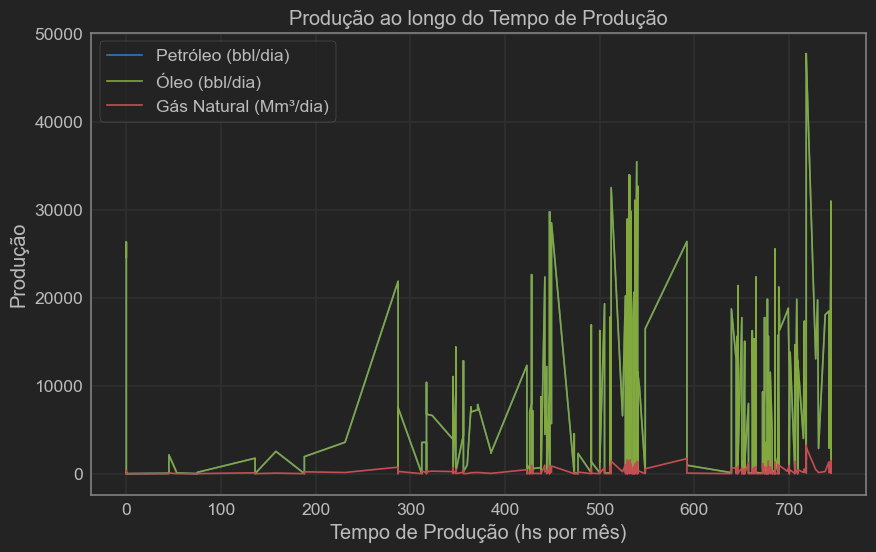

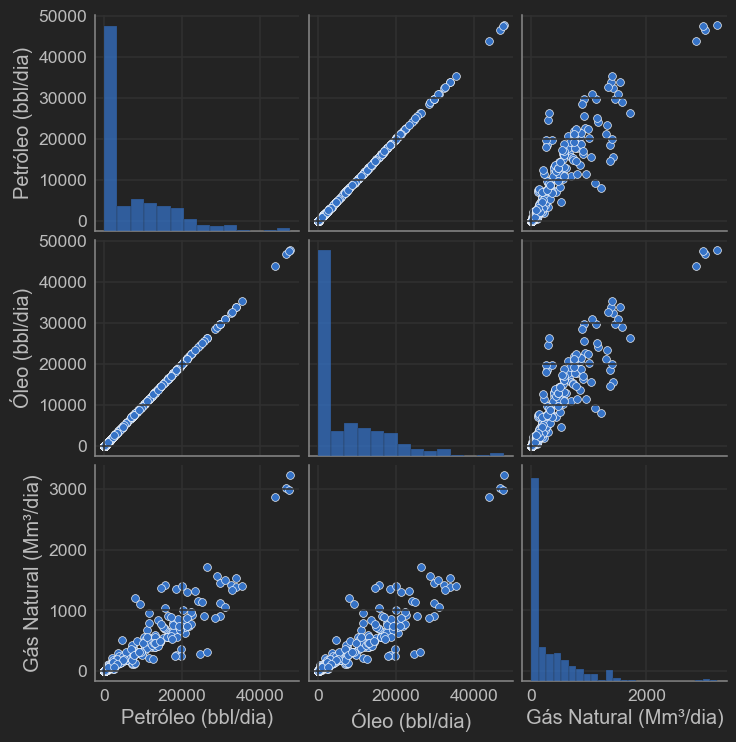

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remover valores nulos antes de plotar
coluna_anp_dropa = comp_anp_data.dropna(subset=["Tempo de Produção (hs por mês)", "Petróleo (bbl/dia)", "Óleo (bbl/dia)", "Gás Natural (Mm³/dia)"])

# 1. Gráfico de dispersão entre Petróleo e Gás Natural
plt.figure(figsize=(10, 6))
plt.scatter(coluna_anp_dropa["Petróleo (bbl/dia)"], coluna_anp_dropa["Gás Natural (Mm³/dia)"], alpha=0.6)
plt.title("Relação entre Produção de Petróleo e Gás Natural")
plt.xlabel("Petróleo (bbl/dia)")
plt.ylabel("Gás Natural (Mm³/dia)")
plt.show()

# 2. Gráfico de linha para o Tempo de Produção
# Ordenando o DataFrame pela coluna de Tempo de Produção
coluna_anp_dropa = comp_anp_data.sort_values(by="Tempo de Produção (hs por mês)")

# Replotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(coluna_anp_dropa["Tempo de Produção (hs por mês)"], coluna_anp_dropa["Petróleo (bbl/dia)"], label="Petróleo (bbl/dia)")
plt.plot(coluna_anp_dropa["Tempo de Produção (hs por mês)"], coluna_anp_dropa["Óleo (bbl/dia)"], label="Óleo (bbl/dia)")
plt.plot(coluna_anp_dropa["Tempo de Produção (hs por mês)"], coluna_anp_dropa["Gás Natural (Mm³/dia)"], label="Gás Natural (Mm³/dia)")
plt.title("Produção ao longo do Tempo de Produção")
plt.xlabel("Tempo de Produção (hs por mês)")
plt.ylabel("Produção")
plt.legend()
plt.show()

# 3. Gráfico de pares para todas as variáveis
sns.pairplot(coluna_anp_dropa[["Petróleo (bbl/dia)", "Óleo (bbl/dia)", "Gás Natural (Mm³/dia)"]])
plt.show()
